In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("shom_data.csv", names=['a', 'b', 'c', 'd', 'label'])
data = data[(data['d'] > 0) & (data['a'] < 15)]

X = data[['a', 'b', 'c', 'd']]

## Réaliser une clusterisation non-supervisée avec la méthode de votre choix (expliquer ce choix).

Une analyse de clustering hiérarchique n'impose pas de nombre de classes a priori et adaptée dans ce contexte où les variables sont numériques et de même ordre de grandeur.

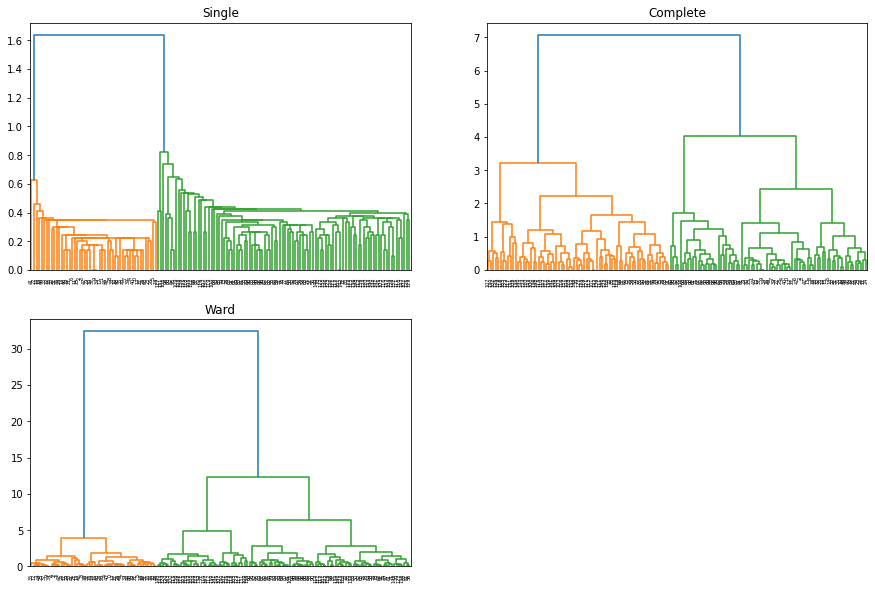

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z_single = linkage(X, method="single")
Z_complete = linkage(X, method="complete")
Z_ward = linkage(X, method="ward")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title("Single")
ax2.set_title("Complete")
ax3.set_title("Ward")
dendrogram(Z_single, ax = ax1)
dendrogram(Z_complete, ax = ax2)
dendrogram(Z_ward, ax = ax3)
plt.delaxes(ax4)
fig.set_size_inches(15, 10)

plt.show()

En comparant des fonctions classiques de liaison, on voit que *single* et *ward* donnent des résultats intéressants avec des sauts importants.

Le clustering montre la présence de deux clusters bien distincts comme on peut identifier sur le plot, sans savoir a priori que le jeu de données est découpé en trois classes il est difficile de le montrer.

On choisit de s'appuyer sur les deux cluster fournis par la méthode *single*.

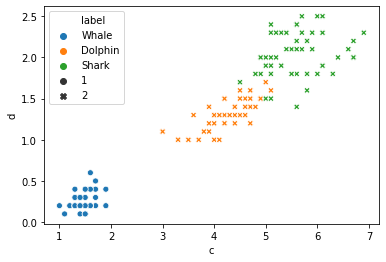

In [4]:
clusters = fcluster(Z_single, 2, criterion='maxclust')
sns.scatterplot("c", "d", data = data, style= clusters, hue = "label")

On constate que le clustering arrive parfaitement à séparer la classe Whale des deux autres.

En sachant qu'il y a en réalité trois classes on peut regarder les résultats obtenus par la fonction *ward* pour trois classes.

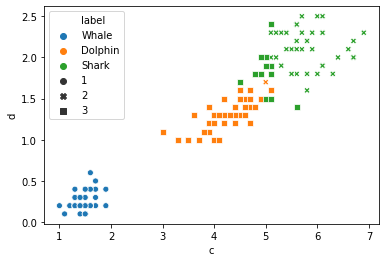

In [5]:
clusters = fcluster(Z_ward, 3, criterion='maxclust')
sns.scatterplot("c", "d", data = data, style= clusters, hue = "label")

Les classes Dolphin et Shark ne sont pas parfaitement séparées.

## Réaliser une clusterisation supervisée avec la méthode de votre choix (expliquer ce choix).

On peut facilement comparer et évaluer des méthodes de classification, on va donc comparer des méthodes de classification classique et selectionner la plus performante.

In [6]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[["a", "b", "c", "d"]], data['label'], test_size=.4)

In [8]:
names = ["Nearest Neighbors", "Linear SVM", "Random Forest", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    QuadraticDiscriminantAnalysis()]

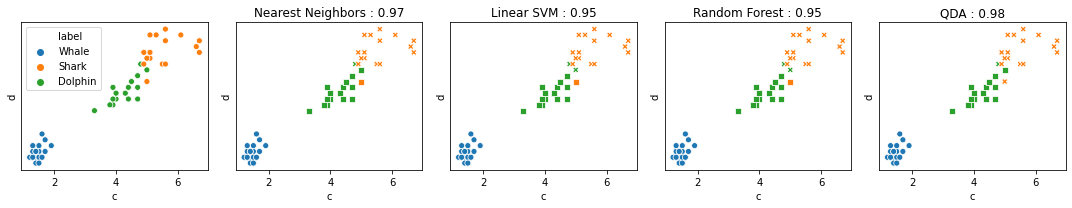

In [9]:
i = 0
f, axes = plt.subplots(1, 1 + len(names), figsize=(15,3), sharex=True)

sns.scatterplot("c", "d", data = X_test, hue = y_test, ax = axes[i])

# iterate over classifiers


for name, clf in zip(names, classifiers):
    i += 1
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    classification = clf.predict(X_test)
    axes[i].set_title(name + " : " + str(np.round(score, 2)))
    sns.scatterplot("c", "d", data = X_test, style= classification, hue = y_test, ax = axes[i], legend=None)
    
plt.setp(axes, yticks=[])
plt.tight_layout()

Les performances de la classification par plus proches voisins sont bonnes, on choisit d'utiliser cette méthode car c'est la méthode la plus simple.

Pouvoir comprendre et expliquer facilement l'algorithme utilisé pour la classification est un critère important dans le choix de la méthode, pour des performances équivalentes on choisit la méthode la plus simple.